In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [325]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [326]:
class_name = 'Occupancy'


dataset_path="/content/drive/Shared drives/DM2/files/df2.csv"
df = pd.read_csv(dataset_path)

# Create a DataFrame object
dfObj = pd.DataFrame(df, columns=['Date'])

# Find a duplicate rows
duplicateDFRow = dfObj[dfObj.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [Date]
Index: []


leggo il dataset ed indicizzo per data usando il campo "Date"

In [327]:
class_name = 'Occupancy'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dataset_path="/content/drive/Shared drives/DM2/files/df2.csv"
df = pd.read_csv(dataset_path, parse_dates=True, index_col='Date', date_parser=dateparse)

df.head()

del df['Hour']
del df['Day']
del df['TimeSlot']
del df['Weekend']
del df['WorkingHour']

#del df['Temperature']
#del df['Humidity']
#del df['Light']
#del df['CO2']
#del df['HumidityRatio']


df.loc[df["Occupancy"] == 1, "Occupancy"] = 'Yes'
df.loc[df["Occupancy"] == 0, "Occupancy"] = 'No'




df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
2015-02-04 17:51:00,14.366102,9.401978,6.015908,4.966792,10.917095,Yes
2015-02-04 17:52:00,14.277350,9.398813,6.048903,4.897070,10.876916,Yes
2015-02-04 17:53:00,14.277350,9.382993,6.015908,4.892261,10.860177,Yes
2015-02-04 17:54:00,14.277350,9.351351,6.015908,4.841773,10.826700,Yes
2015-02-04 17:55:00,14.129430,9.351351,6.015908,4.805710,10.765611,Yes
...,...,...,...,...,...,...
2015-02-10 09:29:00,8.064715,15.607559,6.081897,5.601503,14.223771,Yes
2015-02-10 09:30:00,8.064715,15.535487,6.081897,5.623140,14.156509,Yes
2015-02-10 09:31:00,8.212635,15.605801,6.081897,5.709692,14.295000,Yes


plotto la time series per la feature x

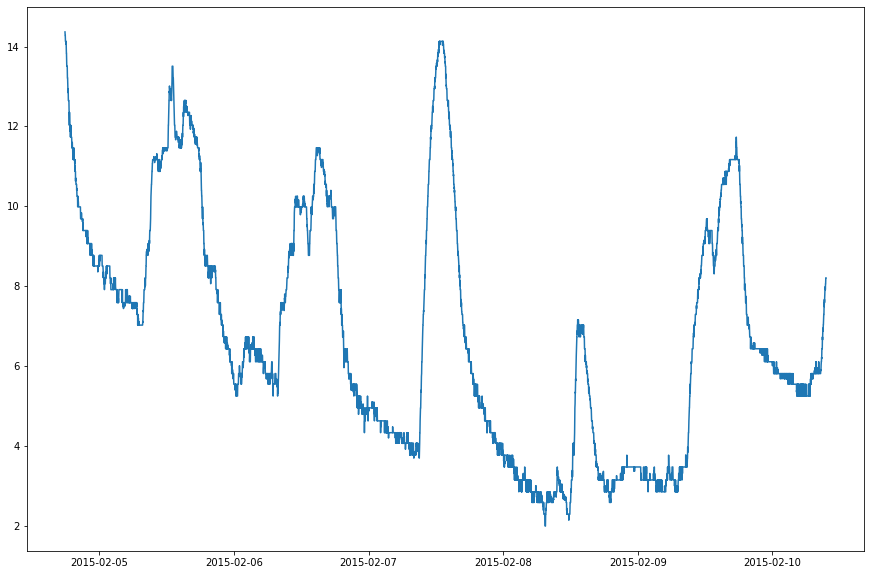

In [328]:
ts = df['Temperature']
plt.figure(figsize=(15,10))
plt.plot(ts)
plt.show()

In [329]:
ts.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:52:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:56:00',
               '2015-02-04 17:57:00', '2015-02-04 17:58:00',
               '2015-02-04 17:59:00', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:24:00', '2015-02-10 09:25:00',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:30:00', '2015-02-10 09:31:00',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', name='Date', length=8143, freq=None)

creo un nuovo indice usando come frequenza un minuto, serve a creare l'oggetto series che sarà usato nel notebook

In [330]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='1min')
print (index)


DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:52:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:56:00',
               '2015-02-04 17:57:00', '2015-02-04 17:58:00',
               '2015-02-04 17:59:00', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:24:00', '2015-02-10 09:25:00',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:30:00', '2015-02-10 09:31:00',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', length=8143, freq='T')


ristampo la time series

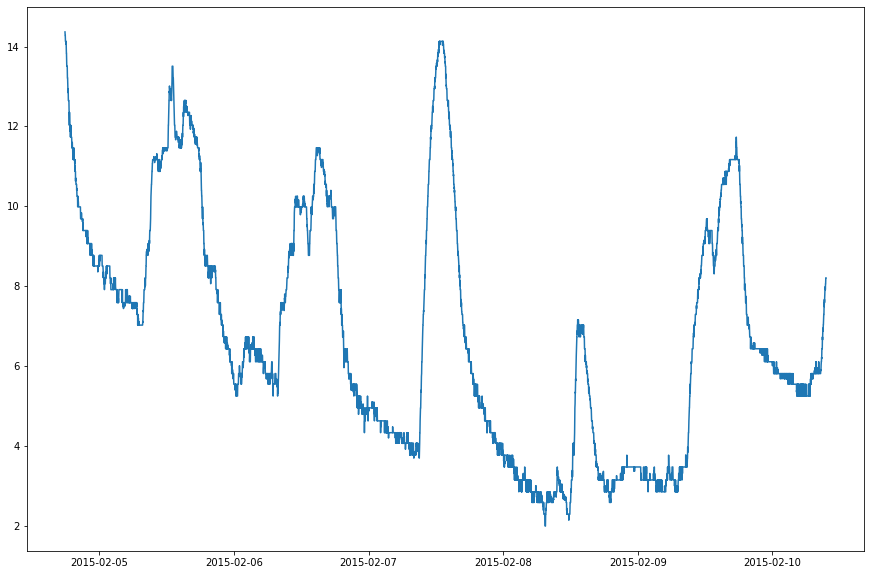

In [331]:
ts = pd.Series(ts.values, index)
plt.figure(figsize=(15,10))
plt.plot(ts)
plt.show()

### Log Tranformation

applico la trasformazione logaritmica, differenziale e logaritmica media

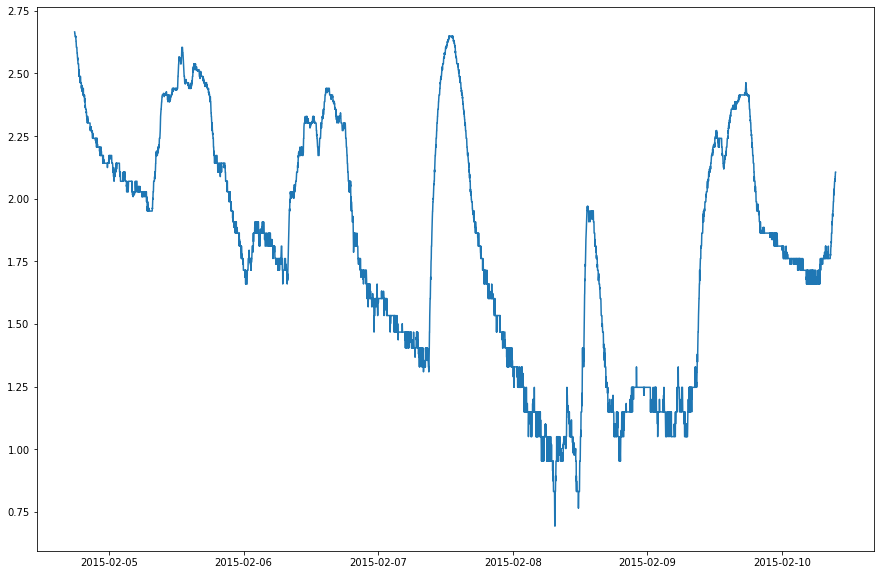

In [332]:
ts_log = pd.Series(np.log(ts), index=ts.index)
plt.figure(figsize=(15,10))
plt.plot(ts_log)
plt.show()

### Diff Tranformation

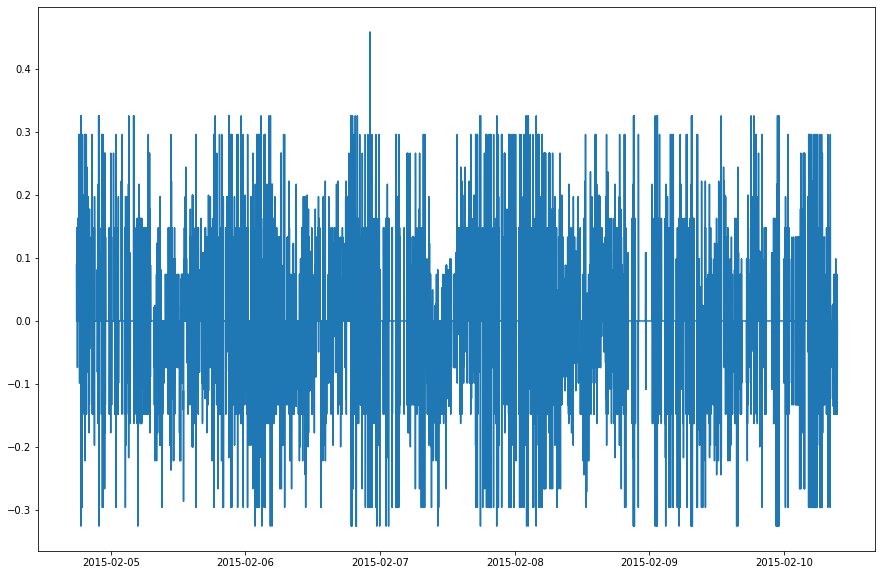

In [333]:
ts_diff = pd.Series(ts[:-1].values - ts[1:].values, index=ts.index[1:])
plt.figure(figsize=(15,10))
plt.plot(ts_diff)
plt.show()

### Log Mean Diff Tranformation

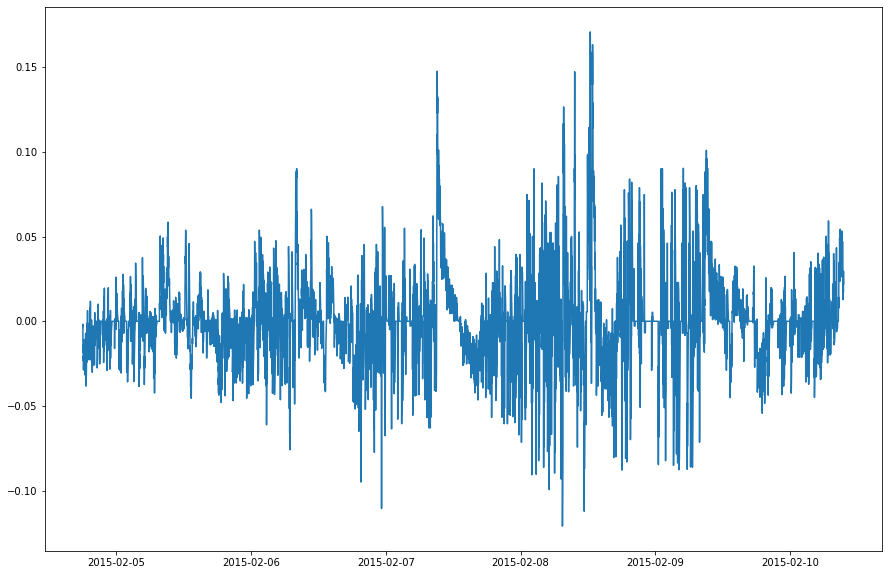

In [334]:
window = 12
ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts.index)
plt.figure(figsize=(15,10))
plt.plot(ts_log_mov_diff)
plt.show()

### Autocorrelation and Partial Autocorrelation

In [0]:
from statsmodels.tsa.stattools import acf, pacf

In [336]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


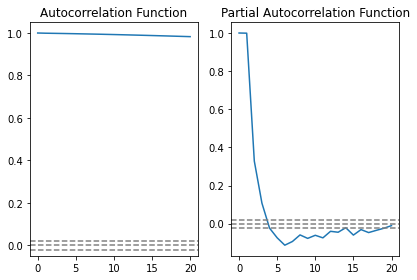

In [337]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


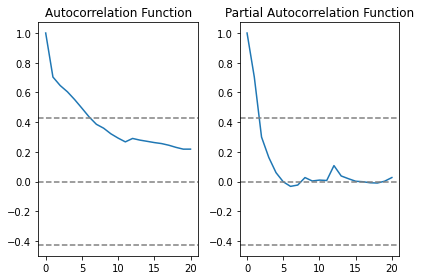

In [338]:
lag_acf = acf(ts_log_mov_diff.values[11:], nlags=20)
lag_pacf = pacf(ts_log_mov_diff[11:], nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

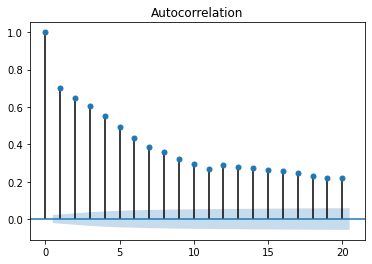

In [340]:
plot_acf(ts_log_mov_diff.values[11:], lags=20)
plt.show()

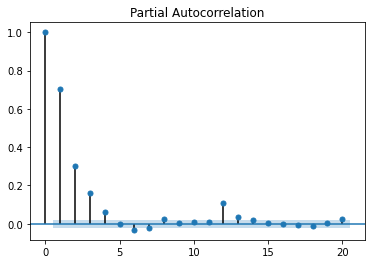

In [341]:
plot_pacf(ts_log_mov_diff.values[11:], lags=20)
plt.show()

### Stationarity 
The Augmented Dickey-Fuller unit root test (http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).
Estimates whether the time series has a time-dependent structure (non-stationary, i.e. affected by trend, seasonality and other phenomena that make the statistics of the time series to vary in time) or not (stationary), which are related to (though quite different from) periodicity and autocorrelation.

In [0]:
from statsmodels.tsa.stattools import adfuller

In [343]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.694434
p-value                           0.075006
#Lags Used                       21.000000
Number of Observations Used    8121.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64


In [344]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.396276
p-value                           0.142790
#Lags Used                       25.000000
Number of Observations Used    8117.000000
Critical Value (1%)              -3.431156
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566960
dtype: float64


In [345]:
dftest = adfuller(ts_log_mov_diff.values[11:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.192035e+01
p-value                        5.049567e-22
#Lags Used                     2.000000e+01
Number of Observations Used    8.111000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64


### Decomposition

In [346]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(ts)

2015-02-04 17:51:00    14.366102
2015-02-04 17:52:00    14.277350
2015-02-04 17:53:00    14.277350
2015-02-04 17:54:00    14.277350
2015-02-04 17:55:00    14.129430
                         ...    
2015-02-10 09:29:00     8.064715
2015-02-10 09:30:00     8.064715
2015-02-10 09:31:00     8.212635
2015-02-10 09:32:00     8.212635
2015-02-10 09:33:00     8.212635
Freq: T, Length: 8143, dtype: float64


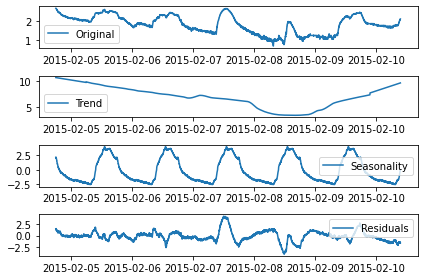

In [347]:
decomposition = seasonal_decompose(ts, freq=1440, extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [348]:
residual.values
residual.value_counts(sort=True)

-1.731640    1
 0.001883    1
-0.404650    1
-0.317852    1
 0.230847    1
            ..
-0.858039    1
 0.445918    1
-0.629628    1
 0.030668    1
-1.832808    1
Length: 8143, dtype: int64

In [349]:
dftest = adfuller(residual.values, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -4.186284
p-value                           0.000695
#Lags Used                       21.000000
Number of Observations Used    8121.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64


In [350]:
!pip install tslearn
from tslearn.generators import random_walks

# Forecasting

In [0]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [0]:
split_index = int (len(ts)/100*70)
train, test = ts.iloc[:split_index], ts.iloc[split_index:]

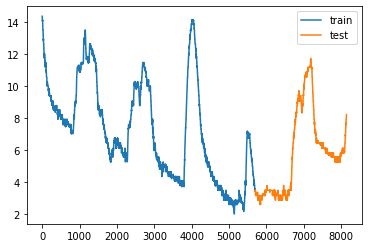

In [354]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts)), test, label='test')
plt.legend()
plt.show()

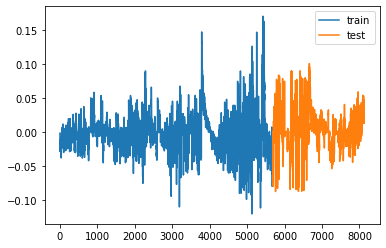

In [363]:
split_index = int (len(ts)/100*70)
train, test = ts_log_mov_diff.iloc[12:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

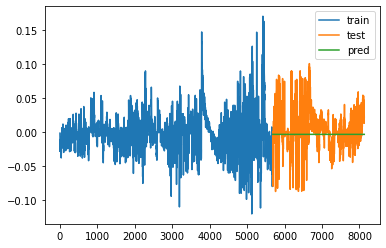

MAE 0.017
RMSE 0.025
MAD 0.009
R2 -0.039
MAPE 4.831
MAXAPE 29.787
TAPE 11803.153


In [364]:
smoothing_level = 1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

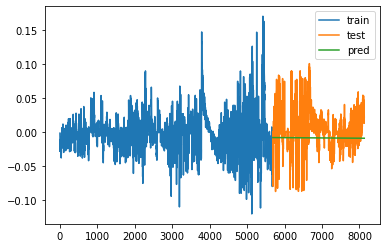

MAE 0.019
RMSE 0.027
MAD 0.011
R2 -0.177
MAPE 2.231
MAXAPE 12.692
TAPE 5450.670


In [381]:
smoothing_level=0.1
smoothing_slope=0.05

holt = Holt(train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

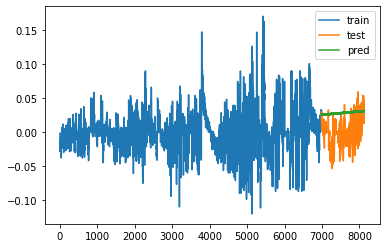

MAE 0.030
RMSE 0.033
MAD 0.028
R2 -3.002
MAPE 1.068
MAXAPE 3.034
TAPE 1220.252


In [358]:
seasonal_periods=12

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

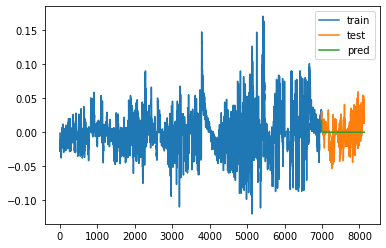

MAE 0.011
RMSE 0.017
MAD 0.006
R2 0.005
MAPE 40.933
MAXAPE 1917.656
TAPE 46786.129


In [359]:
arima = ARIMA(train, order=(1,0,0)).fit()
pred = arima.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

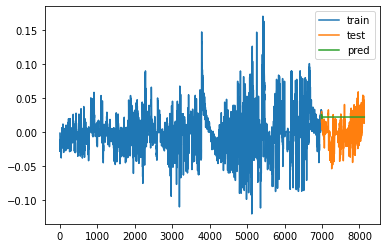

MAE 0.025
RMSE 0.028
MAD 0.022
R2 -1.896
MAPE 1.130
MAXAPE 3.459
TAPE 1291.464


In [360]:
sarimax = SARIMAX(train, order=(1,0,0), seasonal_order=(12, 1, 0, 1)).fit(disp=False)
pred = sarimax.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

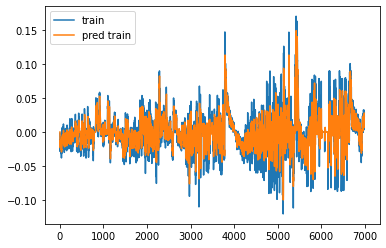

MAE 0.010
RMSE 0.017
MAD 0.005
R2 0.561
MAPE inf
MAXAPE inf
TAPE inf


In [361]:
pred_train = sarimax.predict(start=train.index[0], end=train.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train)), pred_train, label='pred train')
plt.legend()
plt.show()

for k, v in evaluate(train, pred_train, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

In [362]:
print(sarimax.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 6988
Model:             SARIMAX(1, 0, 0)x(12, 1, 0, 1)   Log Likelihood               18390.295
Date:                            Mon, 04 May 2020   AIC                         -36752.591
Time:                                    13:44:39   BIC                         -36656.665
Sample:                                02-04-2015   HQIC                        -36719.533
                                     - 02-09-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2457      5.439     -0.045      0.964     -10.907      10.415
ar.S.L1       -0.2972      5.439   

# prova arima hyperparameters

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = ts.rolling(1440).mean()
    rolstd = ts.rolling(window=1440).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

In [0]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [0]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_log_mov_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue